# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

# Connect Database

In [2]:
db = sqlite3.connect('D:/Mutiara Saviera #2/Data Analytics/Dataset/database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", db)

#Show tables
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# SQL Query

In [3]:
#Check countries name on databases
countries = pd.read_sql("""SELECT *
                        FROM Country;""", db)

#Show query result
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
#Check leagues on databases by joining country table and league table
#Country.id as primary key and league.country_id as foreign key

leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", db)

#Show query result
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [5]:
#Check teams name on databases by ordering the name

teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 15;""", db)

#Show query result
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [6]:
#Check teams name on databases by ordering the name

match = pd.read_sql("""SELECT *
                        FROM Match
                        LIMIT 15;""", db)

#Show query result
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [7]:
#Check leagues by season for Spain, Germany, and England only

leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        sum(home_team_goal+away_team_goal) AS total_goals, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals                                        
                                    FROM Match
                                    JOIN Country on Country.id = Match.country_id
                                    JOIN League on League.id = Match.league_id
                                    WHERE country_name in ('Spain', 'Germany','England')
                                    GROUP BY Country.name, League.name, season
                                    ORDER BY Country.name, League.name, season DESC
                                    ;""", db)

#Show query result
leagues_by_season

,country_name,league_name,season,total_goals,avg_goals
0,England,England Premier League,2015/2016,1026,2.700000
1,England,England Premier League,2014/2015,975,2.565789
2,England,England Premier League,2013/2014,1052,2.768421
3,England,England Premier League,2012/2013,1063,2.797368
4,England,England Premier League,2011/2012,1066,2.805263
5,England,England Premier League,2010/2011,1063,2.797368
6,England,England Premier League,2009/2010,1053,2.771053
7,England,England Premier League,2008/2009,942,2.478947
8,Germany,Germany 1. Bundesliga,2015/2016,866,2.830065
9,Germany,Germany 1. Bundesliga,2014/2015,843,2.754902


# Plot

<AxesSubplot:title={'center':'Average Goals'}>

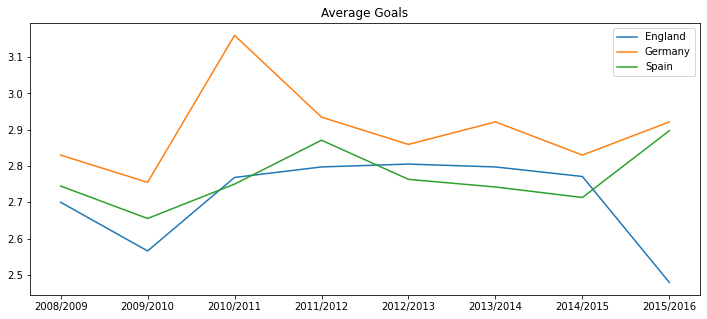

In [8]:
#Plot

df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'England']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])


df.plot(figsize=(12,5),title='Average Goals')